# Capestone Project - Predicting the probability of physical or property damage during a road trip.
### Applied Data Science Capstone by IBM/Coursera


## Table of contents

* [Introduction](#introduction)
* [Data Source](#data)
* [Feature Selection](#feature)
* [Data Visualization](#visualization)
* [Analysis](#analysis)
* [Conclusion and discussion](#conclusion)

## Introduction <a name="introduction"></a>

It is estimated that each year, over 1.5 million people lose their life due to road fatalities. These stem from many factors such as driving under the influence, vehicle failure, reckless driving, road conditions, freak accidents etc. During adverse weather conditions, there is a known increase in the probability of getting into a fatal accident, however, during good weather conditions the same probability is not directly correlated.

With this knowledge in mind, the aim of this research is to predict the probability of an accident resulting in either physical or property damage based on different road and weather conditions as provided in our dataset.



## Data Source <a name="data"></a>

For this project, historical [data](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv) containing vehicle collisions from the year 2004 to present
was used. The data was collected in Seattle, USA and presented as part of the course material.

First we load all the required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing


Here the data will be loaded as a panda data frame.

In [2]:
df = pd.read_csv(r'C:\Users\danny\Downloads\Data-Collisions.csv')

C:\Users\danny\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data Exploration

Now that we have loaded the data, it will then be explored and examined in order to get an idea of its' fretures and composition.

Lets view the columns in the data set: 

In [3]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

Here we fine out the total number of rows and column:

In [4]:
df.shape

(194673, 38)

Next we have a brief view of the make up of our data.

In [5]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


The original data set has over one hundred and ninety thousand rows. Given our computational constraint, it was deceided that for optimal performance, a subset of the original data set will be used. 
A sample of 1000 rows was then chosen. This represented a large enough dataset, as well as one while could be efficiently processed.




In [6]:
S = df[500:1500]


In [7]:
S.shape

(1000, 38)

## Feature selection <a name="feature"></a>

Based on the aim of the research, the features 'SEVERITYCODE','LIGHTCOND', 'WEATHER',
'ROADCOND' were selected as appropriate parameters for building the model:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| SEVERITYCODE   |  A code that corresponds to the severity of the collision: 1-property damage          |
|                |  2- physical injury.                                                                  |
| LIGHTCOND      | The light condition during the collition                                              |
| WEATHER        | A description of the weather conditions duringthe time of the collision.              |
| ROADCOND       | The condition of the road during the collision                                        |


Here a new data set is created containing only the selected feature sets:

In [8]:
S1 = S[['SEVERITYCODE','LIGHTCOND', 'WEATHER', 'ROADCOND']]

In [9]:
S1.head(2)

,SEVERITYCODE,LIGHTCOND,WEATHER,ROADCOND
500,1,Dark - Street Lights On,Clear,Dry
501,2,Dusk,Clear,Dry


In [10]:
S1.dtypes

SEVERITYCODE     int64
LIGHTCOND       object
WEATHER         object
ROADCOND        object
dtype: object

From this new data set we notice that the features LIGHTCOND, WEATHER and ROADCOND are of type object. In order to carry out analysis on the data set we need interger types.Therefore our objective is to convert these feature to a relevant type.

### Converting catigoricat features into numeric.

First the feature set WEATHER is explored. The entries "unknown" and "other"are dropped because they show no relevance to the feature set. The other entries are then converted into numeric type then stored in a new data set.

In [11]:
S1['WEATHER'].value_counts(normalize=True)

Clear                       0.622780
Raining                     0.145246
Overcast                    0.144201
Unknown                     0.076280
Fog/Smog/Smoke              0.004180
Snowing                     0.003135
Other                       0.003135
Sleet/Hail/Freezing Rain    0.001045
Name: WEATHER, dtype: float64

A new data set is then created.

In [12]:
dfx = S1[['SEVERITYCODE', 'LIGHTCOND', 'ROADCOND']]
dfx = pd.concat([dfx,pd.get_dummies(S1['WEATHER'])], axis=1)
dfx.drop(['Unknown','Other'], axis = 1, inplace=True)
dfx.head()

,SEVERITYCODE,LIGHTCOND,ROADCOND,Clear,Fog/Smog/Smoke,Overcast,Raining,Sleet/Hail/Freezing Rain,Snowing
500,1,Dark - Street Lights On,Dry,1,0,0,0,0,0
501,2,Dusk,Dry,1,0,0,0,0,0
502,1,Dawn,Wet,0,0,0,1,0,0
503,1,Daylight,Dry,1,0,0,0,0,0
504,1,Dark - Street Lights On,Dry,0,0,0,0,0,0


In order to facilitate easier formatting for the code, the spaces between the column names are removed and replaced with a "_".

In [13]:
dfx.columns = dfx.columns.str.replace(' ', '_')

In [14]:
dfx['ROADCOND'].value_counts(normalize=True)

Dry           0.714435
Wet           0.203975
Unknown       0.074268
Ice           0.004184
Snow/Slush    0.003138
Name: ROADCOND, dtype: float64

As with the previous feature column, the "unknown" and "other" are dropped from ROADCOND. The other entries are then converted into numeric type then stored in a new data set.

In [15]:
dfx1 = dfx[['SEVERITYCODE', 'LIGHTCOND',  'Clear',
       'Fog/Smog/Smoke', 'Overcast',  'Raining',
        'Sleet/Hail/Freezing_Rain', 'Snowing']]
dfx1 = pd.concat([dfx1,pd.get_dummies(dfx['ROADCOND'])], axis=1)
dfx1.drop(['Unknown'], axis = 1, inplace=True)
dfx1.head()

,SEVERITYCODE,LIGHTCOND,Clear,Fog/Smog/Smoke,Overcast,Raining,Sleet/Hail/Freezing_Rain,Snowing,Dry,Ice,Snow/Slush,Wet
500,1,Dark - Street Lights On,1,0,0,0,0,0,1,0,0,0
501,2,Dusk,1,0,0,0,0,0,1,0,0,0
502,1,Dawn,0,0,0,1,0,0,0,0,0,1
503,1,Daylight,1,0,0,0,0,0,1,0,0,0
504,1,Dark - Street Lights On,0,0,0,0,0,0,1,0,0,0


In [16]:
dfx1['LIGHTCOND'].value_counts(normalize=True)


Daylight                    0.637696
Dark - Street Lights On     0.228272
Unknown                     0.061780
Dusk                        0.046073
Dawn                        0.014660
Dark - Street Lights Off    0.006283
Dark - No Street Lights     0.004188
Other                       0.001047
Name: LIGHTCOND, dtype: float64

The same is done to the LIGHTCOND feature set.

In [17]:
dfx2 = dfx1[['SEVERITYCODE', 'Clear',
       'Fog/Smog/Smoke', 'Overcast',  'Raining',
        'Sleet/Hail/Freezing_Rain', 'Snowing', 'Dry', 'Ice',
        'Snow/Slush', 'Wet']]
dfx2 = pd.concat([dfx2,pd.get_dummies(dfx1['LIGHTCOND'])], axis=1)
dfx2.drop(['Unknown', 'Other'], axis = 1, inplace=True)
dfx2.head()

,SEVERITYCODE,Clear,Fog/Smog/Smoke,Overcast,Raining,Sleet/Hail/Freezing_Rain,Snowing,Dry,Ice,Snow/Slush,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk
500,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
501,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
502,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
503,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
504,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


Another important check is to see whether or not there are null values present in the data set. This is verified: 

In [18]:
%timeit 
dfx2.isnull().any().any()

False

In [19]:
%timeit 
dfx2.isnull().values.sum()

0

In [20]:
dfx2.dtypes

SEVERITYCODE                int64
Clear                       uint8
Fog/Smog/Smoke              uint8
Overcast                    uint8
Raining                     uint8
Sleet/Hail/Freezing_Rain    uint8
Snowing                     uint8
Dry                         uint8
Ice                         uint8
Snow/Slush                  uint8
Wet                         uint8
Dark - No Street Lights     uint8
Dark - Street Lights Off    uint8
Dark - Street Lights On     uint8
Dawn                        uint8
Daylight                    uint8
Dusk                        uint8
dtype: object

In [21]:
dfx2.columns

Index(['SEVERITYCODE', 'Clear', 'Fog/Smog/Smoke', 'Overcast', 'Raining',
       'Sleet/Hail/Freezing_Rain', 'Snowing', 'Dry', 'Ice', 'Snow/Slush',
       'Wet', 'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dawn', 'Daylight', 'Dusk'],
      dtype='object')

In [22]:
dfx2.shape

(1000, 17)

In [23]:
dfx2.head(3)

,SEVERITYCODE,Clear,Fog/Smog/Smoke,Overcast,Raining,Sleet/Hail/Freezing_Rain,Snowing,Dry,Ice,Snow/Slush,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk
500,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
501,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
502,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0


Our data set now contains all the required columns also in the correct data type.

### Data Visualization <a name="visualization"></a>

Now a quick look at our feature set to see the total number of 0 and 1 entries. 

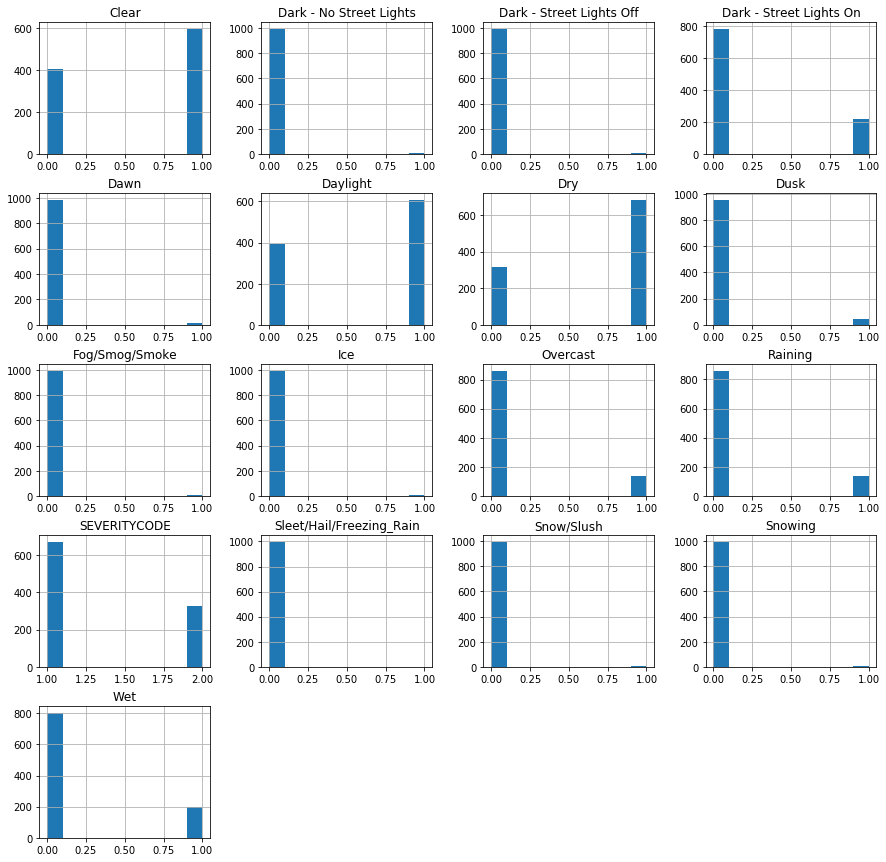

In [24]:
dfx2.hist(bins=10, figsize=(15,15))
plt.show()

We also examine our target variable so as to have an idea if there are sufficient entired so as to have the most accurate model

In [25]:
SV = pd.DataFrame(dfx2.SEVERITYCODE.value_counts())
SV

,SEVERITYCODE
1,674
2,326


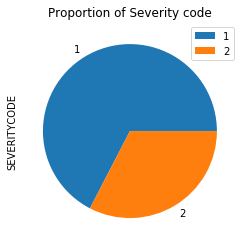

In [70]:
SV.plot(y='SEVERITYCODE',kind='pie', title="Proportion of Severity code")

In [27]:
KL = dfx2.sum()
pd.DataFrame(KL)

,0
SEVERITYCODE,1326
Clear,596
Fog/Smog/Smoke,4
Overcast,138
Raining,139
Sleet/Hail/Freezing_Rain,1
Snowing,3
Dry,683
Ice,4
Snow/Slush,3


Above we view the sum total of each entry.

## Analysis <a name="analysis"></a>

The identified problem for this research was that of a classification type. We tired to predict
whether out outcome would be either a 1 or 2. For this purpose K nearest Neighbour,
Decision Tree, Logistic Regression and Support Vector Machine algorithms were used to
develop our models. These models followed a sequence of FIT – PREDICT – TEST.


In order to view the relationship between the feature sets and the predictive variable, a corrilation is calculated using the corr_matrix function.

In [28]:
corr_matrix = dfx2.corr()
corr_matrix['SEVERITYCODE'].sort_values(ascending=False)

SEVERITYCODE                1.000000
Clear                       0.124793
Dry                         0.111603
Daylight                    0.106961
Dusk                        0.048430
Dark - No Street Lights     0.023524
Fog/Smog/Smoke              0.023524
Dawn                       -0.010241
Ice                        -0.010275
Wet                        -0.019223
Raining                    -0.020436
Sleet/Hail/Freezing_Rain   -0.022004
Overcast                   -0.024667
Dark - Street Lights Off   -0.026409
Snow/Slush                 -0.038150
Snowing                    -0.038150
Dark - Street Lights On    -0.046853
Name: SEVERITYCODE, dtype: float64

There exist both positevely and negatively corrilated sets.

Now lets define the X and Y sets: 

In [29]:
X = dfx2[['Clear', 'Fog/Smog/Smoke',
       'Overcast',  'Raining',
       'Sleet/Hail/Freezing_Rain', 'Snowing', 'Dry', 'Ice', 
       'Snow/Slush',  'Wet',
       'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dawn',
       'Daylight', 'Dusk']]


X.shape


(1000, 16)

In [30]:
Y= dfx2['SEVERITYCODE'].values
Y[0:5]

array([1, 2, 1, 1, 1], dtype=int64)

## Data Normalizaton 

We normalize the data so as to have 0 mean and unit variance. This is done so that the model will have a smaller range of values to work with, thus increasing efficiency. 

In [31]:
Xn= preprocessing.StandardScaler().fit(X).transform(X)
Xn[0:5]

array([[ 0.82331789, -0.06337243, -0.40011599, -0.4017962 , -0.0316386 ,
        -0.0548546 ,  0.68127002, -0.06337243, -0.0548546 , -0.49217479,
        -0.06337243, -0.0776931 ,  1.89397887, -0.11915865, -1.24801633,
        -0.21453462],
       [ 0.82331789, -0.06337243, -0.40011599, -0.4017962 , -0.0316386 ,
        -0.0548546 ,  0.68127002, -0.06337243, -0.0548546 , -0.49217479,
        -0.06337243, -0.0776931 , -0.52798899, -0.11915865, -1.24801633,
         4.66125227],
       [-1.21459768, -0.06337243, -0.40011599,  2.48882394, -0.0316386 ,
        -0.0548546 , -1.46784677, -0.06337243, -0.0548546 ,  2.0317985 ,
        -0.06337243, -0.0776931 , -0.52798899,  8.39217322, -1.24801633,
        -0.21453462],
       [ 0.82331789, -0.06337243, -0.40011599, -0.4017962 , -0.0316386 ,
        -0.0548546 ,  0.68127002, -0.06337243, -0.0548546 , -0.49217479,
        -0.06337243, -0.0776931 , -0.52798899, -0.11915865,  0.80127157,
        -0.21453462],
       [-1.21459768, -0.06337243, -0

## Classification Models

### K Nearest Neighbour



Load the relevant libraries

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In order to find the best K parameter for the KNN algorithm a function is created where we test various values for K up to 50.

In [33]:
def best_k(x,y):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=3)
    
    K = 50
    mean_acc = np.zeros((K-1))
    std_acc = np.zeros((K-1))
    ;

    for n in range(1,K):
        
        neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, Y_train)
        ythatK = neigh.predict(X_test)
        mean_acc[n-1] = metrics.accuracy_score(Y_test, ythatK)
        std_acc[n-1] = np.std(ythatK==Y_test)/np.sqrt(ythatK.shape[0])
        mean_acc.argmax()+1
        
    plt.plot(range(1,K),mean_acc,'g')
    plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0)
    plt.legend(('Accuracy ', '+/- 3xstd'))
    plt.ylabel('Accuracy ')
    plt.xlabel('Number of Nabors (K)')
    plt.tight_layout()
    plt.show()
        
       
        
        
    
    return print("The best value for K is", mean_acc.argmax()+1, )

Calling the function to find the best K value.

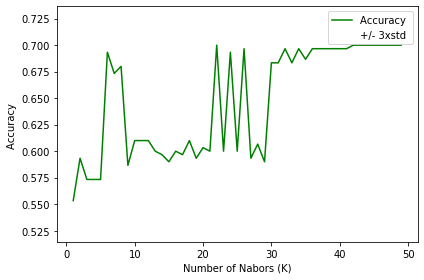

The best value for K is 22


In [34]:
best_k(Xn,Y)

Building the KNN model

In [35]:
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(Xn, Y, test_size=0.3, random_state=3)

k = 22
neigh = KNeighborsClassifier(n_neighbors =k).fit(X_train, Y_train)
ythatK = neigh.predict(X_test)


Here we test the accuracy: 

In [37]:
KNN = metrics.accuracy_score(Y_test, ythatK)
KNN

0.7

## Logistic Regression 

We create a logistic regression model using a liblinear solver

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [39]:
LR = LogisticRegression(C=0.3, solver='liblinear').fit(X_train, Y_train)
yLR = LR.predict(X_test)


In [40]:
yLR[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Testing the accuracy of the mode: 

In [41]:
L_R = metrics.accuracy_score(Y_test, yLR)
print( "Test accuracy: ", metrics.accuracy_score(yLR, Y_test))

Test accuracy:  0.6733333333333333


Another way to view the accuray of the logistic regression is with the use of a confusion matrix:

In [42]:
print("confusion matrix for Logistic Regression: \n" + str(metrics.confusion_matrix(yLR, Y_test)))


confusion matrix for Logistic Regression: 
[[200  88]
 [ 10   2]]


We also calculate the logloss for the model: 

In [43]:
LR_prob_test = LR.predict_proba(X_test)
LogLoss = log_loss(Y_test, LR_prob_test)
Result = pd.DataFrame( {"Log_Loss": [LogLoss]})
Result

,Log_Loss
0,0.648747


## Decision Tree Classifier

When creating a decision tree, the depth of the tree has to be determined. We create a function to determine this depth then call on that function to provide the result:

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
def my_func():
    Ds = 6
    mean = np.zeros((Ds-1))
    
    for n in range(1,Ds):
        
        Dtree = DecisionTreeClassifier(criterion='entropy', max_depth = n)
        Dtree.fit(X_train, Y_train)
        predTree = Dtree.predict(X_test)
        mean[n-1] = metrics.accuracy_score(Y_test, predTree)
        mean.argmax()+1
        
        return print(" Best depth for decision tree is", mean.argmax()+1)

In [46]:
my_func()

 Best depth for decision tree is 1


Building the descision tree with depth of 1

In [47]:
Dtree = DecisionTreeClassifier(criterion='entropy', max_depth = 1)
Dtree.fit(X_train, Y_train)
predTree = Dtree.predict(X_test)

Testing the accuracy of the model:

In [48]:
DT = metrics.accuracy_score(Y_test, predTree)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, predTree))

DecisionTrees's Accuracy:  0.7


## Support Vector Machine

For our SVM model, four different types of kernels were fitted to separate models and then
tested. Rbf, linear, poly and sigmoid were the different kernel functions used. 

In [49]:
from sklearn import svm

#building the model using different kernel functions

clf = svm.SVC(kernel='rbf')
clf1 = svm.SVC(kernel='linear')
clf2 = svm.SVC(kernel='poly', degree=6)
clf3 = svm.SVC(kernel='sigmoid')

clf.fit(X_train, Y_train) 
clf1.fit(X_train, Y_train)
clf2.fit(X_train, Y_train)
clf3.fit(X_train, Y_train)

#testing the predictions from various kernel functions

ysvm = clf.predict(X_test)
ysvm1 = clf1.predict(X_test)
ysvm2 = clf2.predict(X_test)
ysvm3 = clf3.predict(X_test)

Testing the accuracy of the different models: 

In [50]:
SVM1 = metrics.accuracy_score(Y_test, ysvm)
SVM2 = metrics.accuracy_score(Y_test,ysvm1)
SVM3 = metrics.accuracy_score(Y_test, ysvm2)
SVM4 = metrics.accuracy_score(Y_test, ysvm3)

print("Accuracy using RBF kernel functions: ", metrics.accuracy_score(Y_test, ysvm))
print("Accuracy using linear kernel functions: ", metrics.accuracy_score(Y_test,ysvm1))
print("Accuracy using poly kernel functions: ", metrics.accuracy_score(Y_test, ysvm2))
print("Accuracy using sigmoid kernel functions: ", metrics.accuracy_score(Y_test, ysvm3))

Accuracy using RBF kernel functions:  0.67
Accuracy using linear kernel functions:  0.67
Accuracy using poly kernel functions:  0.66
Accuracy using sigmoid kernel functions:  0.6966666666666667


### Comparing the accuracy scores

After running the various models, the accuracy or each is examined.

In [51]:
Compare_Acc = pd.DataFrame({
    
    "KNN" : [KNN],
    "LR": [L_R],
    "DT": [DT],
    "SVM1": [SVM1],
    "SVM2": [SVM2],
    "SVM3": [SVM3],
    "SVM4": [SVM4],
    })

In [52]:
Compare_Acc

,KNN,LR,DT,SVM1,SVM2,SVM3,SVM4
0,0.7,0.673333,0.7,0.67,0.67,0.66,0.696667


## Conclusion and discussion <a name="conclusion"></a>


The aim of this study was to find the best model to predict the categorical outcome of
whether or not a person is more likely to end up with property of physical damage as a
result of a vehicular accident. As was observed in figure 2, the majority of accidents only
resulted in property damage, so our model is expected to reflect this phenomenon. In order
to most accurately predict the outcome of the research, either the K Nearest Neighbour or
the Decision Tree model can be used.

It can be noted, that with further fine tunning of the parameters and feature sets, I might be
possible to achieve even better results with either of these two chosen models.